---
title: "How Can a Wellness Technology Company Play It Smart?"
author: "Aynalem"
date: "2024-02-08"
output:
  html_document: default
---

# Summary 
According to OMB's 2019 study, 61 % of the population own a smart device. This means an increase in market size for high-tech companies like Bellabeat. The customer will use a smart device to monitor their well-being and membership will increase. Bellabeat can use this trend in its digital promotion and e-commerce distribution strategies.
##ASK
###Business task
Finding new growth opportunities by analyzing Smart device usage and coming up with marketing strategy recommendations. 
Key project stakeholders are Urška Sršen co-founder and chief creative officer, and Sando Mur co-founder and member of executive management. Finally, members of the marketing analytic team.
## PREPARE
The data for this project is publicly available and downloaded to a folder specifically designated for the project. The downloaded folder has 18 Comma-separated value(CSV)  files which are structured and organized in a wide data format. The data is collected firsthand(record of observation by smart device) from 30 willing Fitbit users. The data fulfills most of the good aspects of data ethics like ownership, consent, privacy, and openness, which is available and accessible to everyone. 
Completeness and accuracy of data checked to verify the integrity of the data. The data will help the analyst to get insight into the usage of smart devices, especially well-being.  
There are some limitations with the data and additional sources might be used to maintain the integrity of the analysis. Second, minutes, hours, and days are used to organize the data which need to be reorganized to have the same standard of measurement. 
RStudio Desktop version was used for this analysis. First, I started by installing and loading tidyverse package. 

In [1]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Then, the CSV files were uploaded,

In [3]:
dailyActivity_merged <- read.csv("/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


In [4]:
sleepDay_merged <- read.csv("/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [5]:
weightLogInfo_merged <- read.csv("/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Each data structure was checked using the view() function.
Furthermore,  functions like;

In [6]:
str(dailyActivity_merged)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [7]:
glimpse(dailyActivity_merged)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [8]:
str(sleepDay_merged)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [9]:
str(weightLogInfo_merged)

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


Used to see the overall structure of the data. 

##PROCESS
Due to the size of some the data frame, RStudio were used for all data analysis purposes. 
Data integrity throughout its life-cycle is maintained by using the same format, and data constraints which determine validity,  by making sure it is aligned with the business objective or checking data errors. This makes sure that the data is valid, accurate, complete, and consistent.  
###Cleaning
I started by installing a package of here,skimr and janitor, to start the cleaning process.

In [10]:
install.packages("here")
library("here")
install.packages("janitor")
library("janitor")
install.packages("skimr")
library("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

here() starts at /kaggle/working

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Using janitor package, variable name cleaned 

In [11]:
clean_names(dailyActivity_merged)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


In [12]:
clean_names(sleepDay_merged)

id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


In [13]:
clean_names(weightLogInfo_merged)

id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12
4319703577,5/4/2016 11:59:59 PM,72.3,159.3942,NA,27.38,True,1.462406e+12
4558609924,4/18/2016 11:59:59 PM,69.7,153.6622,NA,27.25,True,1.461024e+12
4558609924,4/25/2016 11:59:59 PM,70.3,154.9850,NA,27.46,True,1.461629e+12


Here, the date data types are mentioned as characters, which need adjustment. Using lubiredate package, we can change the data type as below, 

In [14]:
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(lubridate)

In [16]:
dailyActivity_merged$ActivityDate <- mdy(dailyActivity_merged$ActivityDate)


In [17]:
class(dailyActivity_merged$ActivityDate)

[1] "Date"

To drop the hour’s value from the below two data frames on sleep and weight, which will make it possible to join with Daily activity data Frame.

In [18]:
sleepDay_merged$SleepDay <- format(mdy_hms(sleepDay_merged$SleepDay), format= "%m/%d/%y")

In [19]:
weightLogInfo_merged$Date <- format(mdy_hms(weightLogInfo_merged$Date), format = "%m/%d/%y")

Now, it is possible to change the data type to date 

In [20]:
sleepDay_merged$SleepDay <- mdy(sleepDay_merged$SleepDay)

In [21]:
str(sleepDay_merged)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [22]:
mdy(weightLogInfo_merged$Date)

[1] "2016-05-02" "2016-05-03" "2016-04-13" "2016-04-21" "2016-05-12"
 [6] "2016-04-17" "2016-05-04" "2016-04-18" "2016-04-25" "2016-05-01"
[11] "2016-05-02" "2016-05-09" "2016-04-17" "2016-04-12" "2016-04-13"
[16] "2016-04-14" "2016-04-15" "2016-04-16" "2016-04-17" "2016-04-18"
[21] "2016-04-19" "2016-04-20" "2016-04-21" "2016-04-22" "2016-04-23"
[26] "2016-04-24" "2016-04-25" "2016-04-27" "2016-04-28" "2016-04-29"
[31] "2016-04-30" "2016-05-01" "2016-05-02" "2016-05-03" "2016-05-04"
[36] "2016-05-05" "2016-05-06" "2016-05-07" "2016-05-08" "2016-05-09"
[41] "2016-05-10" "2016-05-11" "2016-05-12" "2016-04-12" "2016-04-13"
[46] "2016-04-14" "2016-04-16" "2016-04-18" "2016-04-19" "2016-04-20"
[51] "2016-04-21" "2016-04-23" "2016-04-24" "2016-04-25" "2016-04-26"
[56] "2016-04-27" "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-01"
[61] "2016-05-03" "2016-05-04" "2016-05-06" "2016-05-08" "2016-05-09"
[66] "2016-05-11" "2016-05-12"

####Rename,SleepDay and ActivityDate variable to Date from DailyActivity_merged and sleepDay_merged data frame, respectivily. 

In [23]:
dailyActivity_merged <- dailyActivity_merged %>%
rename(Date= ActivityDate)

In [24]:
sleepDay_merged <- sleepDay_merged %>%
rename(Date= SleepDay)

####Duplicate 
First, I need to check if there are duplicate values.

In [25]:
dailyActivity_merged[duplicated(dailyActivity_merged),]

Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>


In [26]:
sleepDay_merged[duplicated(sleepDay_merged),]

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<int>,<int>
162,4388161847,2016-05-05,1,471,495
224,4702921684,2016-05-07,1,520,543
381,8378563200,2016-04-25,1,388,402


In [27]:
weightLogInfo_merged[duplicated(weightLogInfo_merged),]

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>


duplicates were found with sleepDay_merged Data, which needs to be removed,

In [28]:
sleepDay_merged <- distinct(sleepDay_merged)

##ANALYSIS
Summarizing and understanding the data frame.
How many participants,

In [29]:
n_distinct(dailyActivity_merged$Id)

n_distinct(sleepDay_merged$Id)


[1] 33

[1] 24

Summary of selected variables observation 

In [30]:
dailyActivity_merged%>%
select(TotalSteps,TotalDistance,SedentaryMinutes)%>%
summary()

sleepDay_merged%>%
select(TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed)%>%
summary()


   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

###Relationship between variables 
Total steps and sedentary minutes, which are negative 

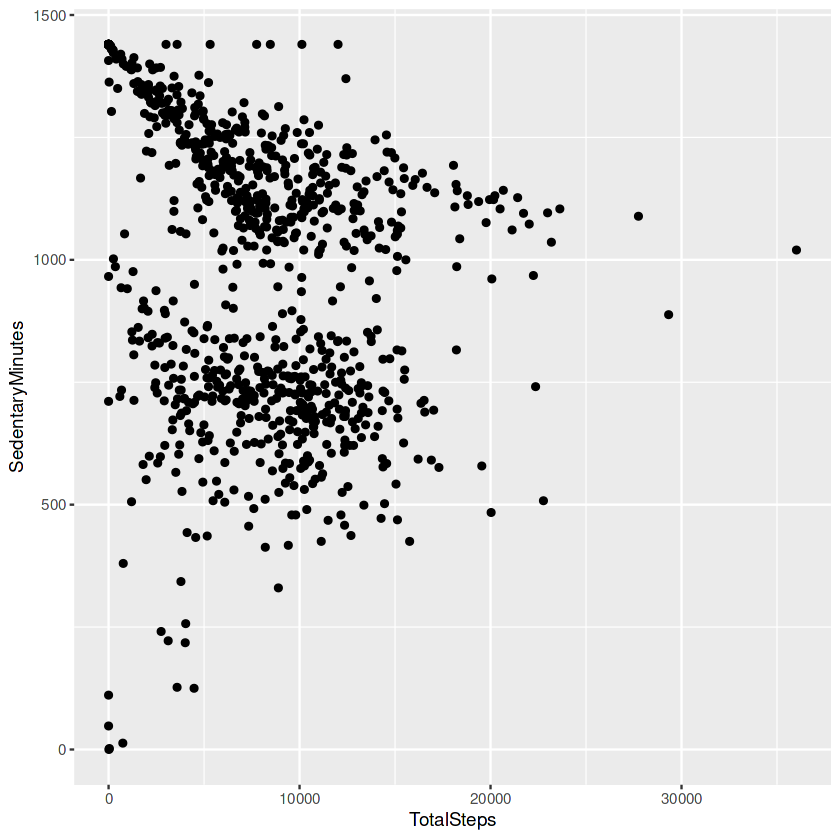

In [31]:
ggplot(data=dailyActivity_merged)+ geom_point(mapping = aes(x=TotalSteps,y=SedentaryMinutes))

The Correlation coefficient can be calculated as below;

In [32]:
cor(dailyActivity_merged$TotalSteps,dailyActivity_merged$SedentaryMinutes)

[1] -0.3274835

The relationship between total time in bed and sleep time is almost linear. As we can see below,

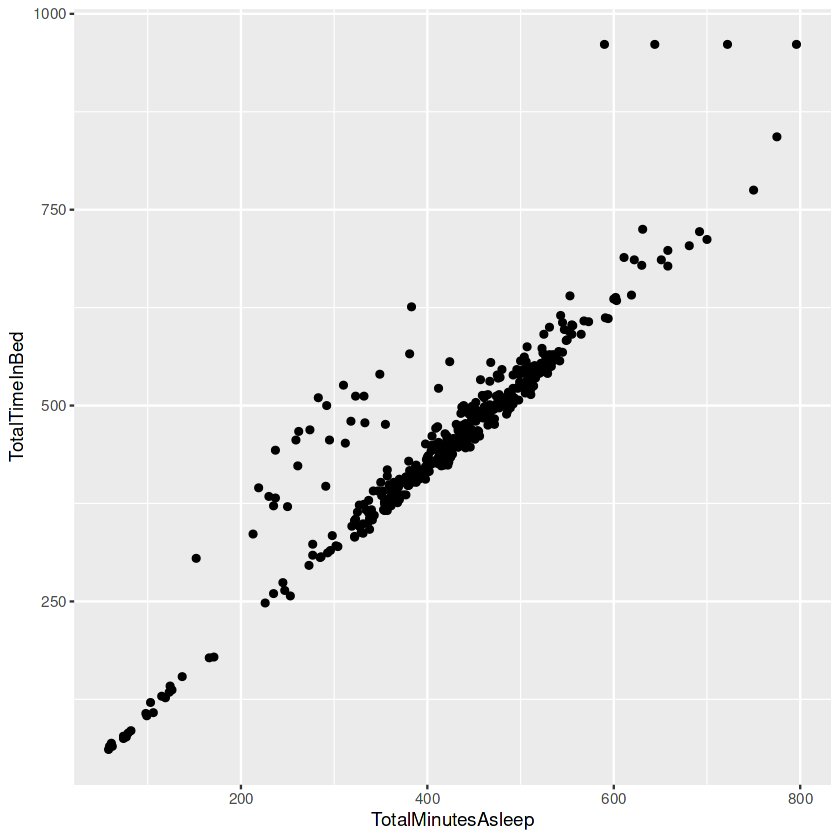

In [33]:
ggplot(data=sleepDay_merged) + geom_point(mapping = aes(x=TotalMinutesAsleep,y=TotalTimeInBed))


The correlation coefficient seems to indicate that as well

In [34]:
cor(sleepDay_merged$TotalMinutesAsleep,sleepDay_merged$TotalTimeInBed)

[1] 0.9304224

However, data shows that high bedtime doesn’t necessarily mean asleep time, as shown below, using geom_smooth. 

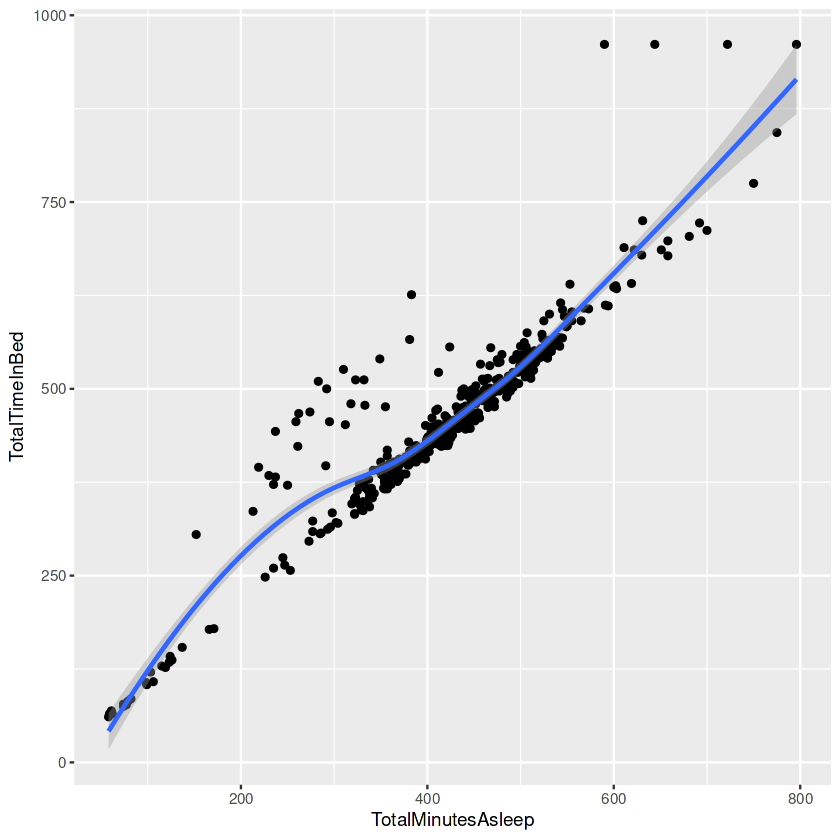

In [35]:
ggplot(data=sleepDay_merged) + geom_point(mapping = aes(x=TotalMinutesAsleep,y=TotalTimeInBed)) + geom_smooth(mapping = aes(x=TotalMinutesAsleep,y=TotalTimeInBed),method = 'loess',formula = 'y~x')

###Merging 
Merging the data set for further analysis,
Since the merge function shows the out-join only, as seen below;

In [36]:
combined_data_1 <- merge(dailyActivity_merged,sleepDay_merged,by="Id")

n_distinct(combined_data_1$Id)

[1] 24

it is better to use, inner-join to combine the data set, using two variables "Id"and "Date"

In [37]:
combine_data_2 <- inner_join(dailyActivity_merged,sleepDay_merged,by=c("Id","Date"))

The relationship between sleep time and total steps is minimal,

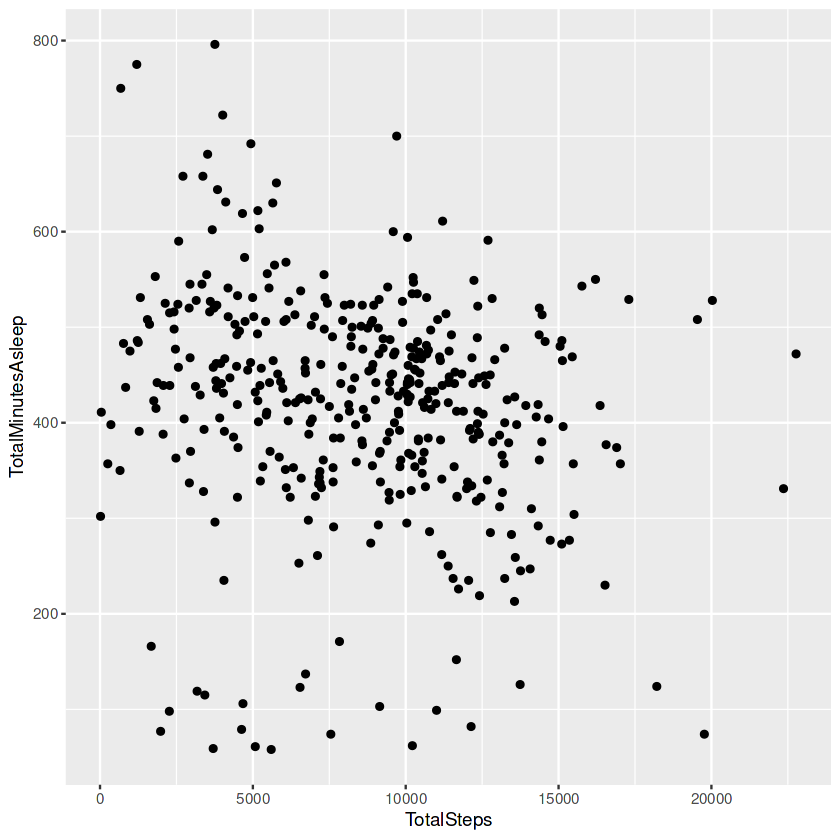

In [38]:
ggplot(data= combine_data_2) + geom_point(mapping = aes(x=TotalSteps,y=TotalMinutesAsleep))

However, the relationship between sedentary and Asleep time is negative.

specaily, the higher the sedentary time the lower asleep time. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


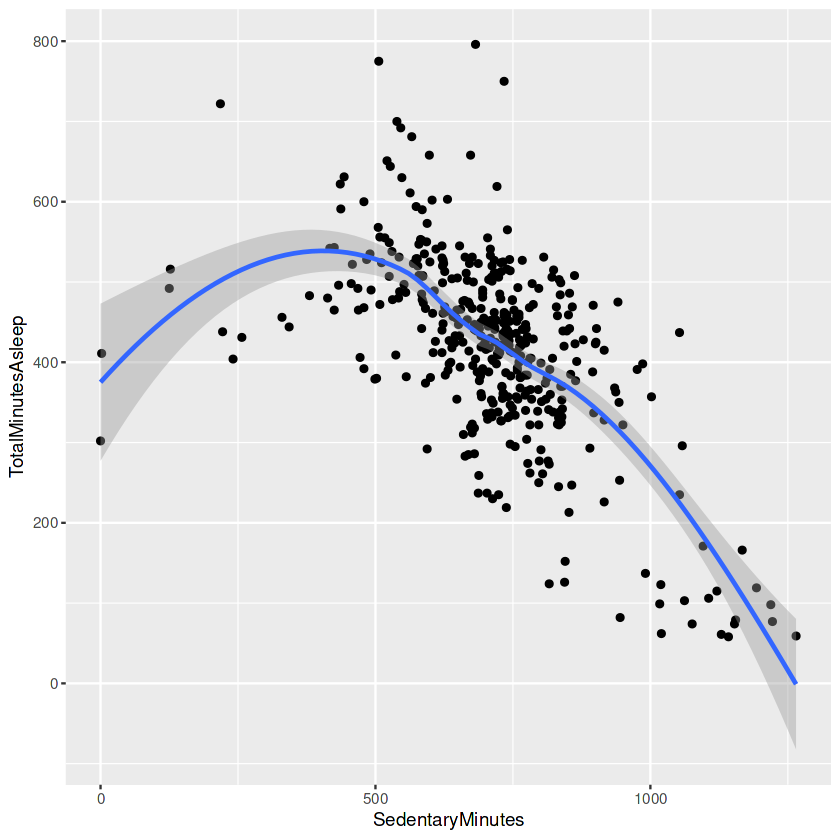

In [39]:
ggplot(data= combine_data_2) + geom_point(mapping = aes(x=SedentaryMinutes,y=TotalMinutesAsleep)) + geom_smooth(mapping = aes(x=SedentaryMinutes,y=TotalMinutesAsleep))

##SHARE

There is clear relationship between total steps and sedentary Minutes.

 * More steps mean less sedentary time and vice versa, eventhough not very strong

Warning message in geom_smooth(mapping = aes(x = TotalSteps, y = SedentaryMinutes, :
“Ignoring unknown aesthetics: method and formula”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


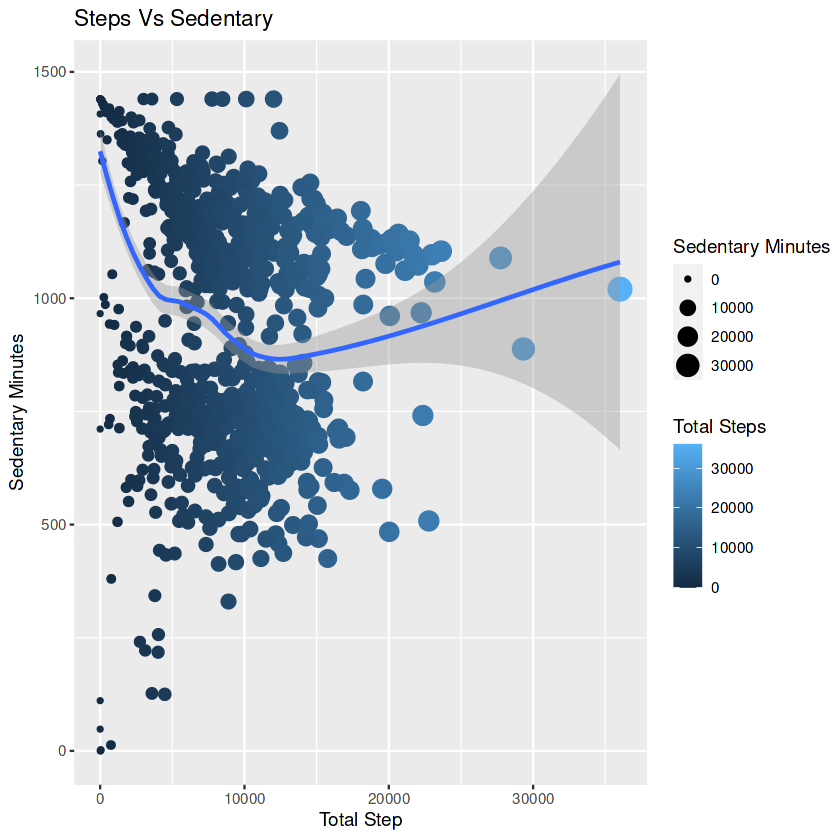

In [40]:
ggplot(data=dailyActivity_merged)+ geom_point(mapping = aes(x=TotalSteps,y=SedentaryMinutes,col= TotalSteps,size=TotalSteps)) + geom_smooth(mapping = aes(x=TotalSteps,y=SedentaryMinutes, method = 'loess', formula = 'y ~ x')) + labs(x="Total Step", y= "Sedentary Minutes", title= "Steps Vs Sedentary", col="Total Steps",size="Sedentary Minutes")

In [41]:
cor(dailyActivity_merged$TotalSteps,dailyActivity_merged$SedentaryMinutes)

[1] -0.3274835

Relationship between Total time in Bed and Total minutes a sleep.
* More time in bed mean more time asleep. But high bed time doesn't guaranty high asleep time

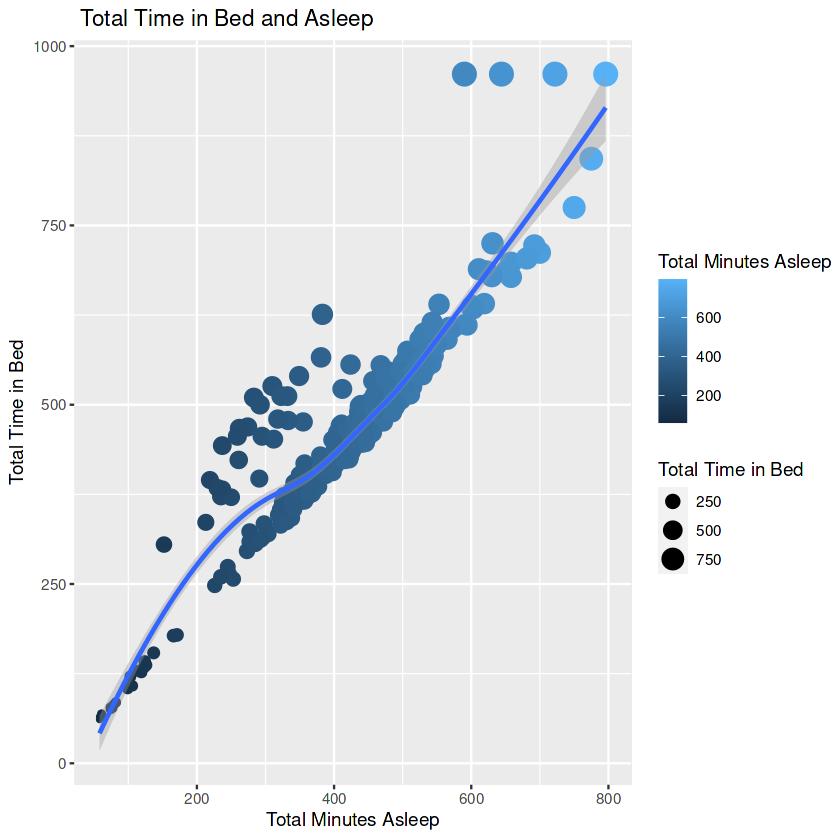

In [42]:
ggplot(data=sleepDay_merged) + geom_point(mapping = aes(x=TotalMinutesAsleep,y=TotalTimeInBed,size=TotalTimeInBed,col=TotalMinutesAsleep)) + geom_smooth(mapping = aes(x=TotalMinutesAsleep,y=TotalTimeInBed),method = 'loess',formula = 'y~x') + labs(x="Total Minutes Asleep", y="Total Time in Bed",title = " Total Time in Bed and Asleep", col="Total Minutes Asleep",size="Total Time in Bed")

On the other hand, there are negative relationship between Sedentary time and Asleep time. 

Warning message in geom_smooth(mapping = aes(x = SedentaryMinutes, y = TotalMinutesAsleep, :
“Ignoring unknown aesthetics: method and formula”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


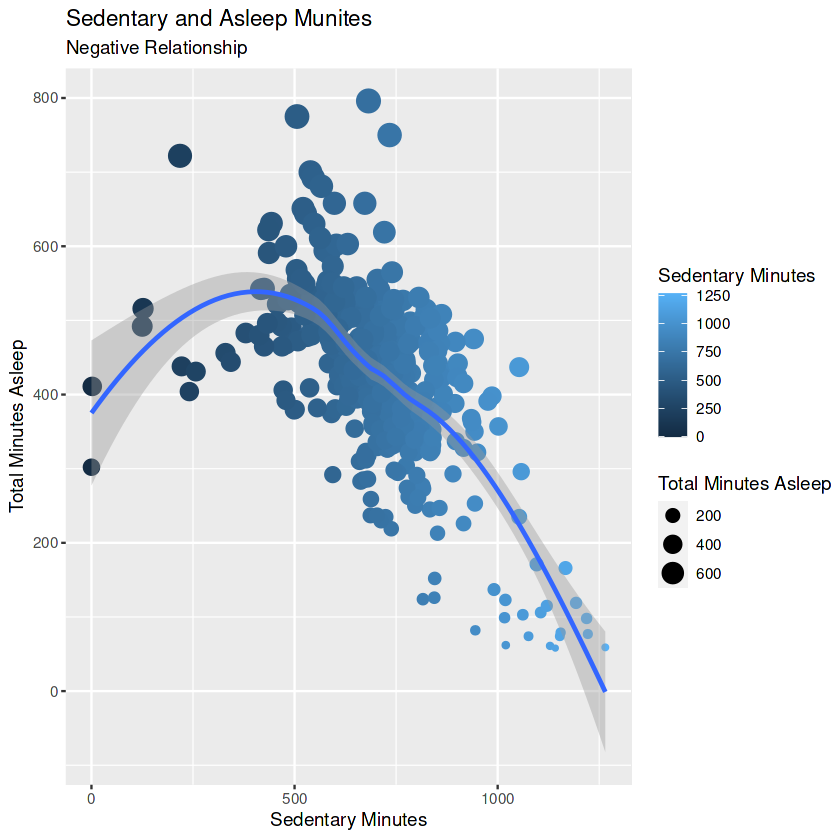

In [43]:
ggplot(data= combine_data_2) + geom_point(mapping = aes(x=SedentaryMinutes,y=TotalMinutesAsleep, col=SedentaryMinutes,size=TotalMinutesAsleep)) + geom_smooth(mapping = aes(x=SedentaryMinutes,y=TotalMinutesAsleep,method ='loess',formula = 'y~x')) + labs(x= "Sedentary Minutes", y="Total Minutes Asleep", title = "Sedentary and Asleep Munites", subtitle="Negative Relationship",col="Sedentary Minutes", size="Total Minutes Asleep")

##ACT
###Recommendations
 * Increase Ads showing better sleep habit can be achieved using Bellabeat smart device which monitor sedentary time and provide advise to move. 
 * Member subscription can increase by providing good health habit advisories, increase bed time, step
 * New product which can monitor weight automatically 
###Limitation
Further data need since maximum of 33 participant is not enough to understand the whole smart device usage. 
